In [1]:
import os
from pathlib import Path
import torch
import warnings
warnings.filterwarnings('ignore')

from data import get_loaders
from data.transformation import data_transforms
from models.pretrained import get_pretrained_model
from train import train
from utils.inference import *
from utils.utils import *

PROJ_ROOT = os.pardir
data_dir = os.path.join(PROJ_ROOT, 'transfer-learning', 'dataset')

In [2]:
cloudy_path = Path('dataset', 'cloudy')
rain_path = Path('dataset', 'rain')
sunrise_path = Path('dataset', 'sunrise')
shine_path = Path('dataset', 'shine')

## Example Images

Shape: (576, 1024, 3)


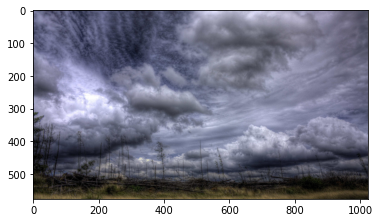

In [3]:
cloudy = cloudy_path / 'cloudy8.jpg'
show_img(cloudy)

Shape: (400, 660, 3)


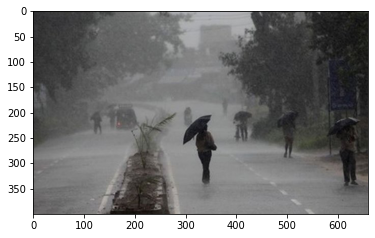

In [4]:
rain = rain_path / 'rain10.jpg'
show_img(rain)

Shape: (360, 480, 3)


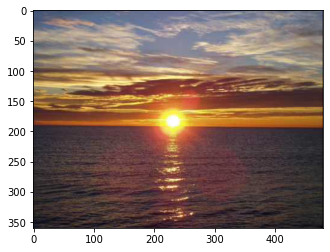

In [5]:
sunrise = sunrise_path / 'sunrise12.jpg'
show_img(sunrise)

Shape: (480, 852, 3)


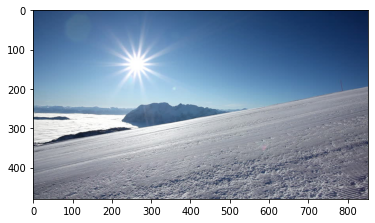

In [6]:
shine = shine_path / 'shine24.jpg'
show_img(shine)

## Load Model

In [13]:
model = get_pretrained_model('resnet50', 4)
model_path = Path('saved_models/resnet-weather.pt')
model.load_state_dict(torch.load(model_path))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Inference

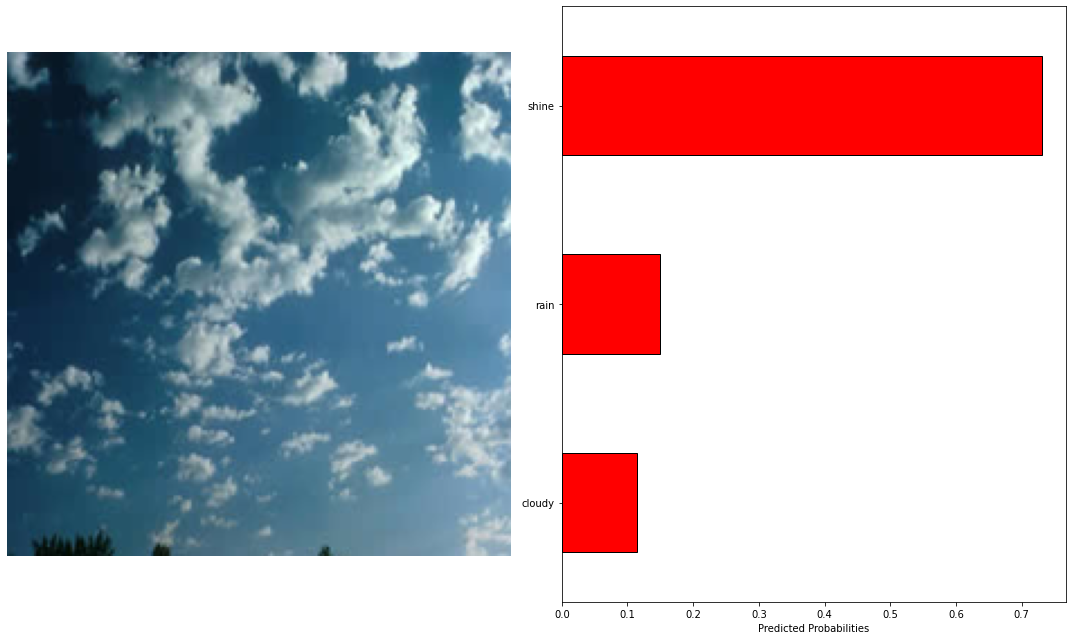

In [8]:
test_img = cloudy_path / 'cloudy117.jpg'

plot_prediction(data_dir, test_img, model, 3)

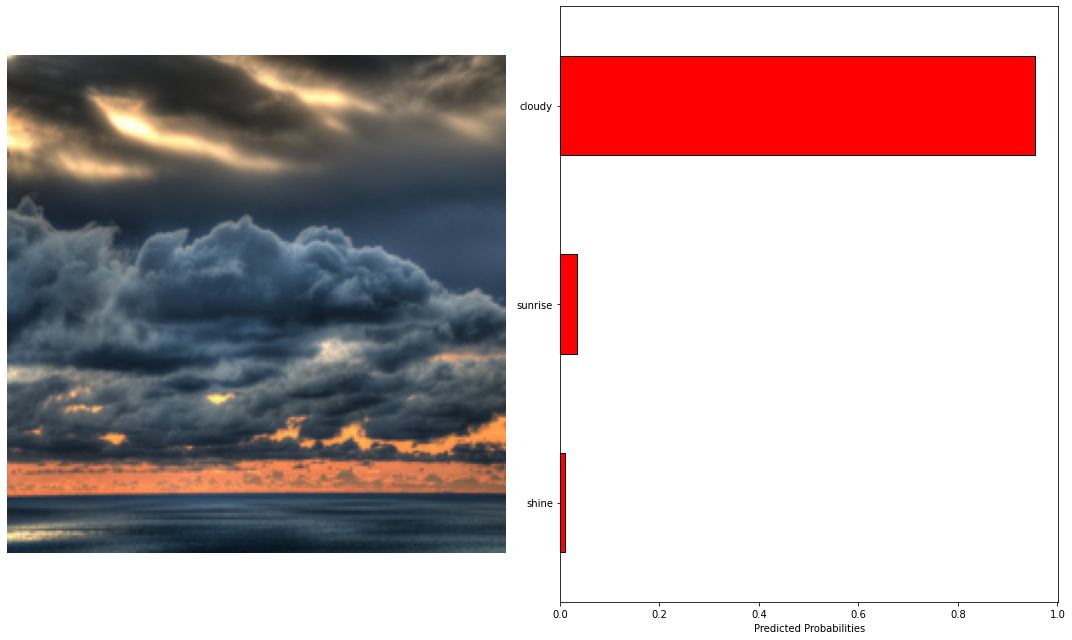

In [9]:
test_img = cloudy_path / 'cloudy75.jpg'

plot_prediction(data_dir, test_img, model, 3)

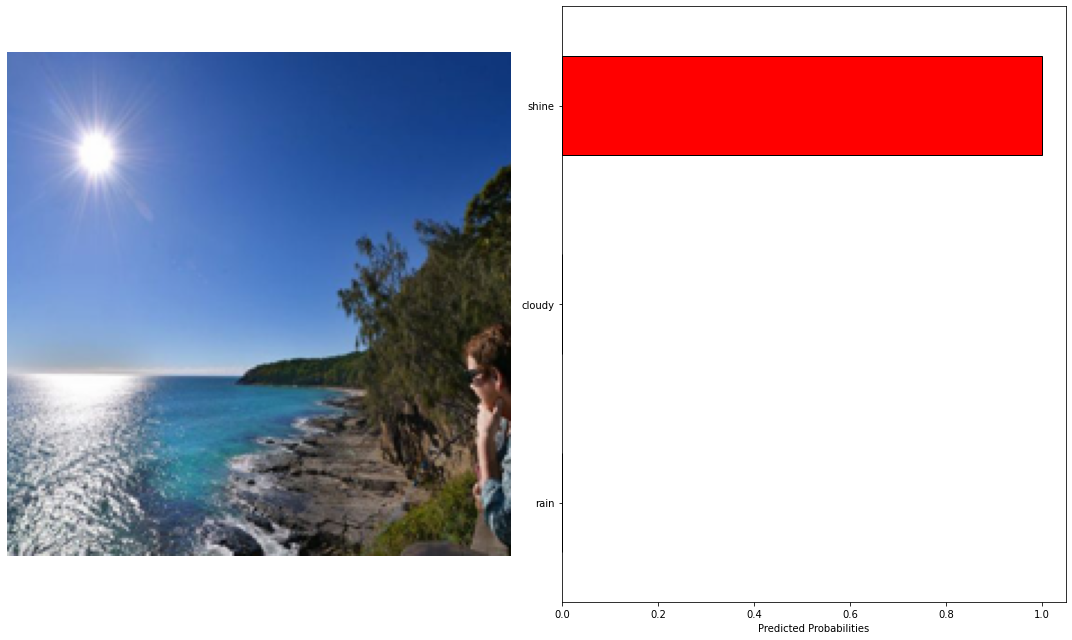

In [10]:
test_img = shine_path / 'shine75.jpg'

plot_prediction(data_dir, test_img, model, 3)

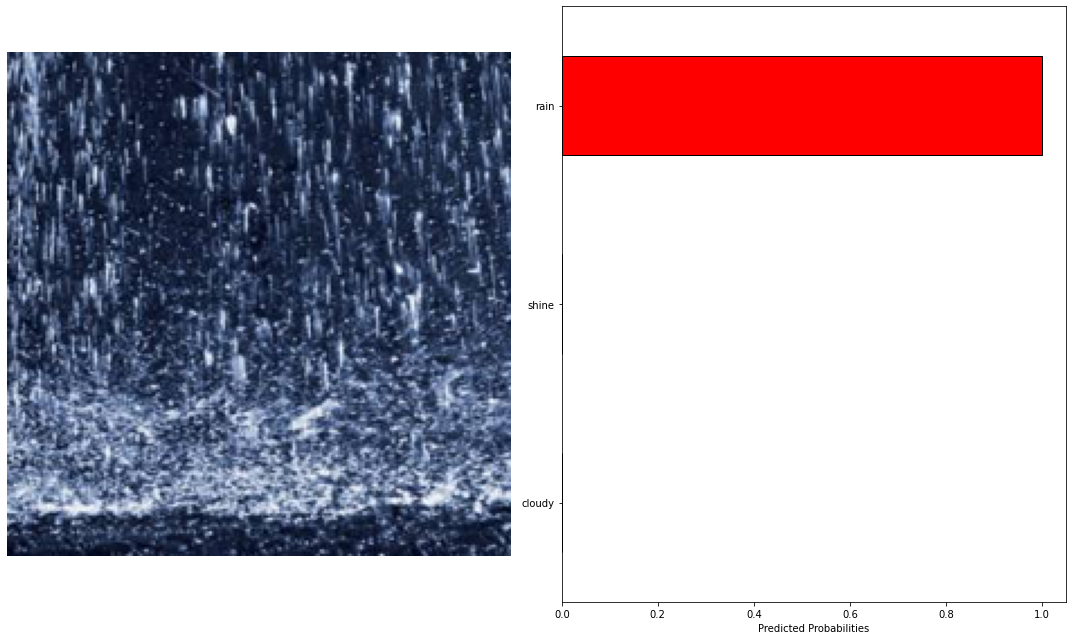

In [11]:
test_img = rain_path / 'rain57.jpg'

plot_prediction(data_dir, test_img, model, 3)

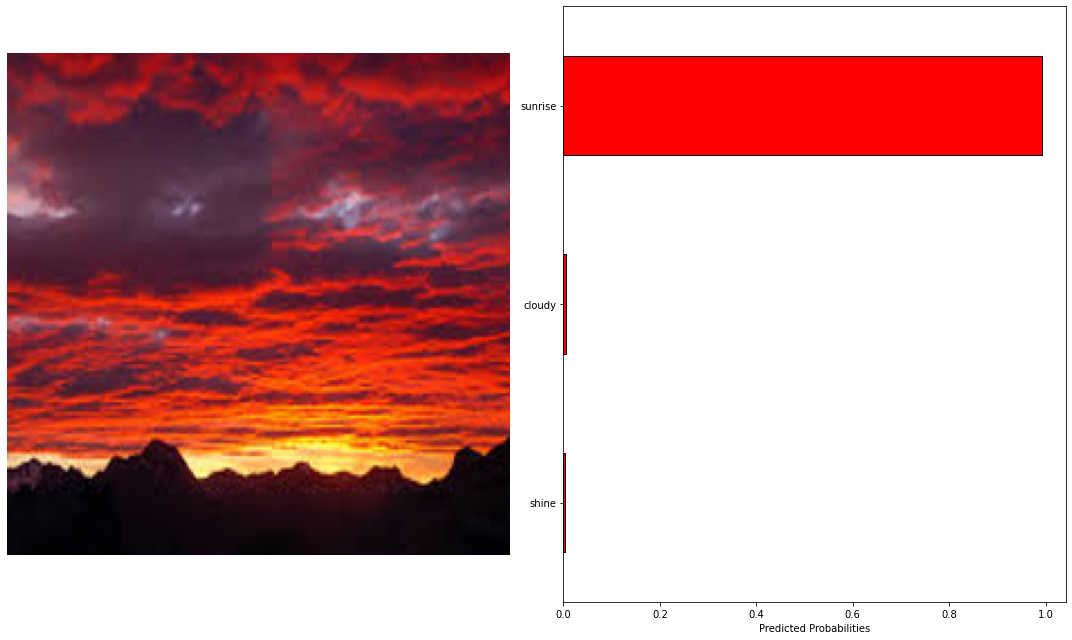

In [12]:
test_img = sunrise_path / 'sunrise42.jpg'

plot_prediction(data_dir, test_img, model, 3)